# Part II - Income, Population and Health. What does the data say?
## by Olubunmi Adejimi

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.
> The nations of the world have been known to be grouped into various economic classes, these classes not only affect the perception of others nations about a country but also in many ways represents the condition of the country beyond the economy. For this analyses, I explore the impact of economic class on the population, infant and maternal health of countries all over the world with a focus on continents.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> This is a dataset of the Population growth, fertility, life expectancy and mortality for countries all over the world collected from https://data.un.org/. This data is combined with a `GeoJSON` file collected from https://geojson-maps.ash.ms/, to have a more detailed dataset for a robust analyses.

In [83]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
cp = sns.color_palette()
sns.set_context("paper", rc={"axes.labelsize":12}, font_scale=1.5)
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [56]:
# load in the dataset into a pandas dataframe
dff = pd.read_csv('pop_mort.csv', encoding='latin').iloc[:, 1:]

In [57]:
dff['Year'] = dff['Year'].astype('str')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> More than 60% of the countries in the world are classified to be either **least developed** or **developed** economies. 
> Over the 10 years the economic status and income level of various countries has improved.


> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## Introduction

> Apart from geographical classifications, countries arre most commonly classified based on their economic status. 

> The Gross national Income (GNI) per capita serves as as an index that truly represents the income level of citizens in a country.

> Many parameters can be used to represent the health condition of a nation, including:
   * Life expectancy
   * Maternal Mortality
   * Infant Mortality

> The relationship between income and these health parameters is important to understand the effect of economy on health.

## Income level

> The World Bank classifies countries based on their GNI per capita to 4 income levels: High income, Upper-middle income, Lower-middle income and Low income.

> More than 50% of the countries in the world are classified to be either **High income** or **developed** economies. 



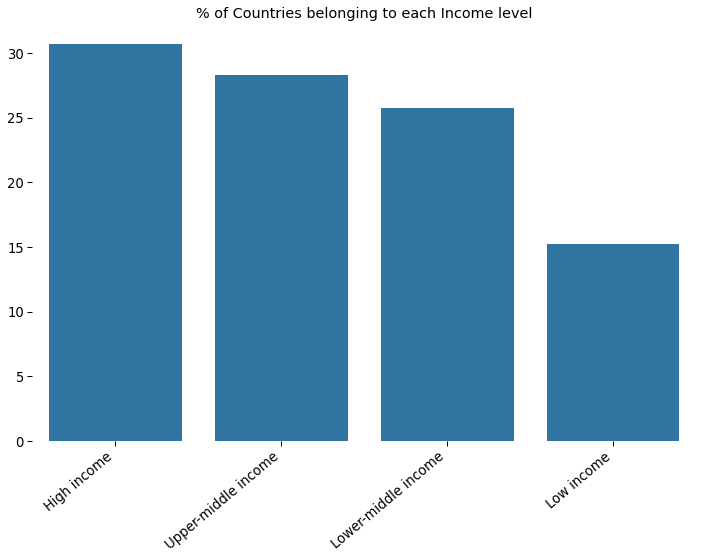

In [58]:
y = (dff['Income level'].value_counts()/dff['Income level'].value_counts().sum())*100


plt.figure(figsize=(10, 8))
sns.barplot(x=y.index, y=y.values, color=cp[0])
plt.xticks(rotation=40, ha='right');
plt.title('% of Countries belonging to each Income level')
plt.box(False)


plt.tight_layout();

## Income level

> Has the number of countries in each economic level changed between 2010 and 2020?

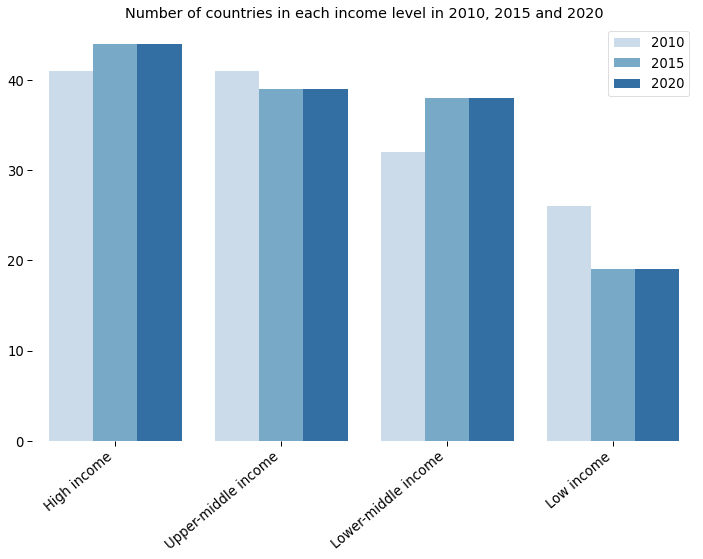

In [59]:
plt.figure(figsize=(10, 8))
plt.box()
sns.countplot(x='Income level', data=dff,  
              order = dff['Income level'].value_counts().index, 
              hue='Year', palette='Blues');
plt.xticks(rotation=40, ha='right');
plt.ylabel('')
plt.xlabel('')
plt.title('Number of countries in each income level in 2010, 2015 and 2020')
plt.tight_layout();
plt.legend(bbox_to_anchor=(1, 1))

> Over the 10 years the economic status and income level of various countries has improved. The number of **High income** and **Lower-middle income** countries increased and there are less **Low income** countries in 2020 compared to 2010.

## Question 1.

> What is relationship between GNI per cpaita and health parameters, as well, as population growth and fertility rate?

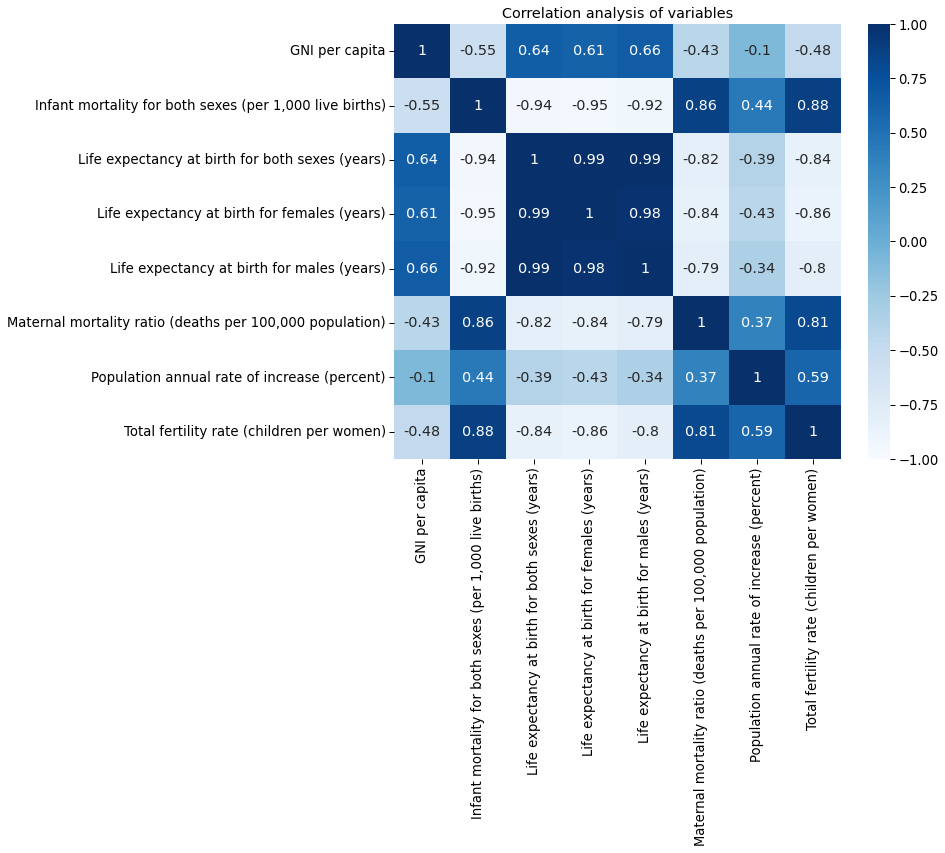

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(dff.corr(), cmap='Blues', annot=True, center=0, vmin=-1);
plt.xlabel('');
plt.ylabel('');
plt.title('Correlation analysis of variables');


> The correlation analysis indicates that the Gross National Income (GNI) per capita is weakly correlated to the life expectancy, maternal mortality and infant mortality. 

> GNI per capita has no very poor negative correlation to the population growth and the fertility rate.

## Effect of Income level on Health

> How does the income level of the nations affect the health and well-being of its citizens?

> The income level (indicated by the GNI per capita) is positively most correlated (0.64) to life expectancy. Life expectancy is an indication of the health of citizens.

> Life expectancy has a high negative correlation to infant and maternal mortality, as well as, fertility rate. This indcates that life expectancy increases when these variables decrease.

> Infant mortality, maternal mortality and fertility rate have strong positive correlation to each other.

> We can conclude that even if the income/economic level does not have a strong correlation to life expectancy (health), the correlation is strong enough that economic growth can increase life expectancy.

## Question 2.

> How does geographic group and income level impact these health parameters?

> Effect of **Income** on **Infant Mortality** by region and income level

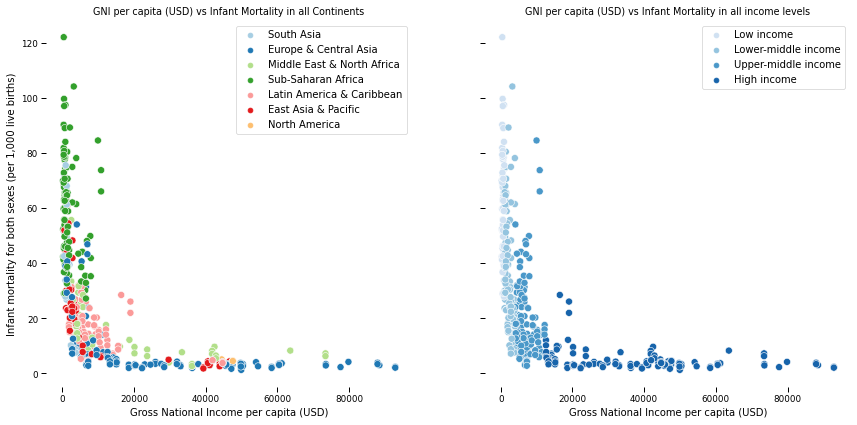

In [79]:
fig, ax = plt.subplots(1,2,figsize=(12, 6), sharey=True)
sns.scatterplot(x='GNI per capita', y='Infant mortality for both sexes (per 1,000 live births)', data=dff,
              hue='region', palette='Paired', s=50, 
              #hue_order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
              ax=ax[0],  #size_order=[40, 100, 300, 600]
              );
sns.scatterplot(x='GNI per capita', y='Infant mortality for both sexes (per 1,000 live births)', data=dff,
              hue='Income level', palette='Blues', s=50,
              hue_order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
              ax=ax[1],  #size_order=[40, 100, 300, 600]
              );
ax[0].set_xlabel('Gross National Income per capita (USD)');
ax[1].set_xlabel('Gross National Income per capita (USD)');
ax[0].set_title('GNI per capita (USD) vs Infant Mortality in all Continents');
ax[1].set_title('GNI per capita (USD) vs Infant Mortality in all income levels');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
ax[0].legend(prop={'size': 10});
ax[1].legend(prop={'size': 10});

>  GNI per capita has a negative non-linear relationship to Infant mortality.

>  Sub-saharan Africa and parts of South Asia have the highest infant mortality rate.

>  Low-income and lower-middle income countries are more likely to have highinfant mortality.

> Effect of **Income** on **Maternal Mortality** by region and income level.

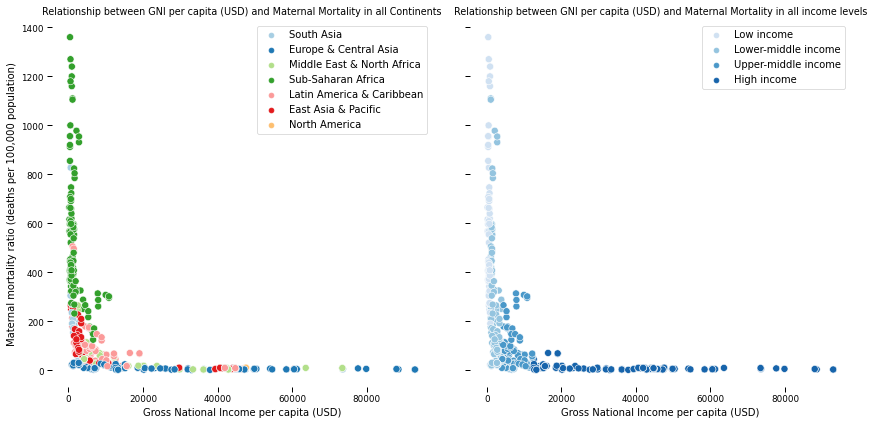

In [77]:
sns.set_context("paper", rc={"axes.labelsize":10})
fig, ax = plt.subplots(1,2,figsize=(12, 6), sharey=True)
sns.scatterplot(x='GNI per capita', y='Maternal mortality ratio (deaths per 100,000 population)', data=dff,
              hue='region', palette='Paired', s=50,
              #hue_order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
              ax=ax[0],  #size_order=[40, 100, 300, 600]
              );
sns.scatterplot(x='GNI per capita', y='Maternal mortality ratio (deaths per 100,000 population)', data=dff,
              hue='Income level', palette='Blues', s=50,
              hue_order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
              ax=ax[1],  #size_order=[40, 100, 300, 600]
              );
ax[0].set_xlabel('Gross National Income per capita (USD)');
ax[1].set_xlabel('Gross National Income per capita (USD)');
ax[0].set_title('Relationship between GNI per capita (USD) and Maternal Mortality in all Continents');
ax[1].set_title('Relationship between GNI per capita (USD) and Maternal Mortality in all income levels');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)

ax[0].legend(prop={'size': 10});
ax[1].legend(prop={'size': 10});
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

>  GNI per capita has a negative non-linear relationship to Maternal mortality.

>  Sub-saharan Africa and parts of South Asia have the highest maternal mortality rate.

>  Low-income and Lower-middle income countries are more likely to have high maternal mortality.

> Effect of **Income** on **Life expectancy** by region and income level

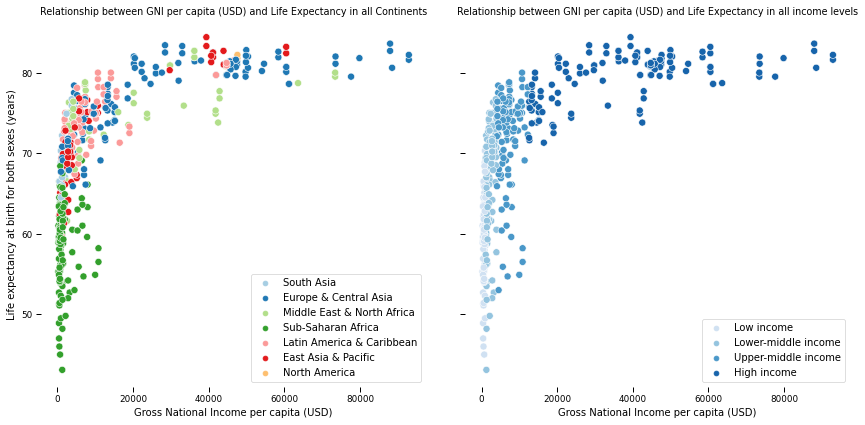

In [85]:
sns.set_context("paper", rc={"axes.labelsize":10})
fig, ax = plt.subplots(1,2,figsize=(12, 6), sharey=True)
sns.scatterplot(x='GNI per capita', y='Life expectancy at birth for both sexes (years)', data=dff,
              hue='region', palette='Paired', s=50,
              #hue_order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
              ax=ax[0],  #size_order=[40, 100, 300, 600]
              );
sns.scatterplot(x='GNI per capita', y='Life expectancy at birth for both sexes (years)', data=dff,
              hue='Income level', palette='Blues', s=50,
              hue_order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
              ax=ax[1],  #size_order=[40, 100, 300, 600]
              );
ax[0].set_xlabel('Gross National Income per capita (USD)');
ax[1].set_xlabel('Gross National Income per capita (USD)');
ax[0].set_title('Relationship between GNI per capita (USD) and Life Expectancy in all Continents');
ax[1].set_title('Relationship between GNI per capita (USD) and Life Expectancy in all income levels');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)

ax[0].legend(prop={'size': 10});
ax[1].legend(prop={'size': 10});
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

>  GNI per capita has a positive non-linear relationship to life expectancy.

>  Sub-saharan Africa and parts of South Asia have the lowest life expectancy with some countries having life expectancy lower than 50 years old.

>  Low-income and Lower-middle income countries are more likely to have high maternal mortality. SOme Upper-middle income countries alsoo have low life expectancies.

> The effect of the **GNI per capita** on these health  *indicators* in different regions and income levels, reveals a pattern of low income economies having worse health, predominated by Sub-saharan African countries.

## Question 3.

> Has the health (Life expectancy) of many countries improved over time?

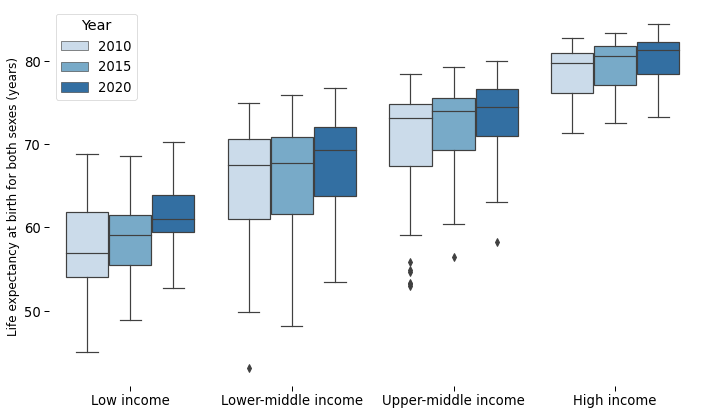

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income level', order= ['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
                y='Life expectancy at birth for both sexes (years)', data=dff, hue='Year', 
                palette = 'Blues');
# Infant mortality for both sexes (per 1,000 live births)
plt.box(False)
plt.xlabel('');
plt.tight_layout()

> Focusing on Life expectancy as an indicator of health and well-being, the health of citizens have improved regardless of their income level.

> Although **low income** countries have seen the highest change in median life expectancy between 2010 and 2020, they still have the lowest life expectancy ranging from 45 to 70 years of life, while **high income** countries range from >70 to 80+ years.

## **Income**, **Fertility rate** and **Population Growth**.

> Does **Income** affect **Population growth**

<Figure size 720x576 with 0 Axes>

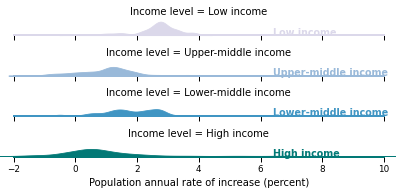

In [35]:
g = sns.FacetGrid(dff, row='Income level', hue='Income level', aspect=8, height=.7, 
              palette='PuBuGn');
g.map(sns.kdeplot, 'Population annual rate of increase (percent)', 
                fill=True, bw_adjust=.5, clip_on=False, alpha=1);
    #plt.xlim(-0.1, 10000000)
g.set_titles("");
g.set(yticks=[], ylabel="");
g.despine(bottom=True, left=True);
g.figure.subplots_adjust(hspace=-.45);
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False);
plt.xlim(-2, 10);

def label(x, color, label):
        ax = plt.gca()
        ax.text(0.7, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


g.map(label, 'Population annual rate of increase (percent)');


> The **income level** has minimal effect on **population growth**, with a lot of overlap in the distribution of population increase rate in different economies.

> Does this hold true in different **regions** of the world?

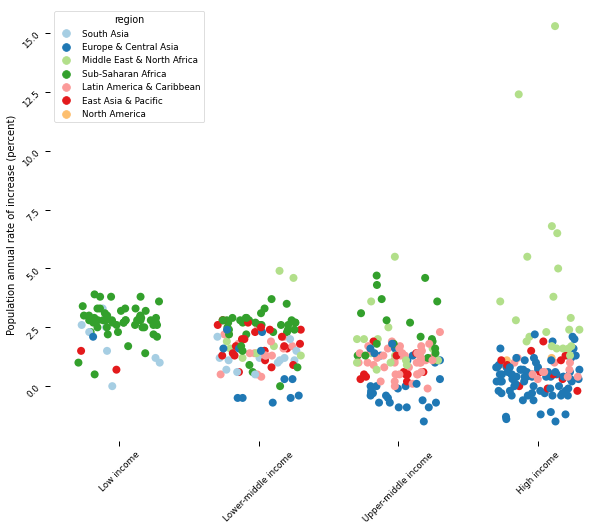

In [36]:
plt.figure(figsize=(10, 8))
sns.stripplot(x='Income level', #'GNI per capita', 
                 y='Population annual rate of increase (percent)', data=dff,
              hue='region', palette='Paired', size=8, 
              order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
              #hue_order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
              #size='Year',
            jitter=.3  );
plt.xlabel('');
plt.box(False)
plt.tick_params(rotation=45)

> Generally, countries from various **regions** and **income levels** have similar **population growth**.

> **Fertility** and **Population Growth**

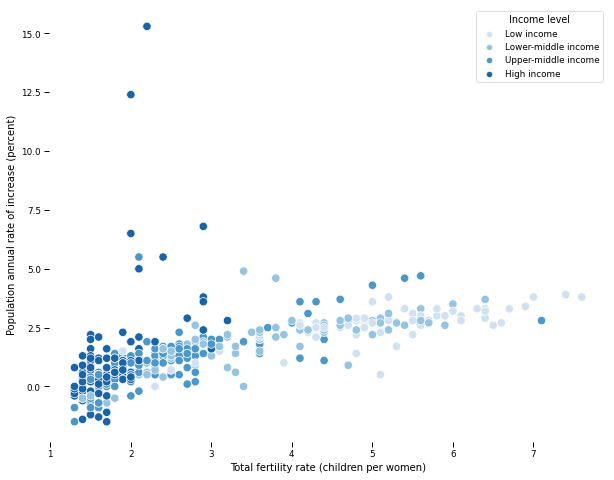

In [37]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total fertility rate (children per women)', y='Population annual rate of increase (percent)', data=dff,
              hue='Income level', palette='Blues', 
              hue_order=['Low income', 'Lower-middle income', 'Upper-middle income', 'High income'], 
             s=70#,  size_order=[40, 100, 300, 600],
              );
plt.xlabel('Total fertility rate (children per women)');
plt.box(False)

> Fertility rate has a moderate positive correlation (r=0.59) to population growth.

> Most countries in the world have annual population increase between -1.5% to 5% regardles of their fertility rate. 

> Few countries surpasss the 5% annual increase e.g. Qatar and UAE, while also have a low fertility rate.

> Income level only has a weak effect on population growth, but lower income countries generally have higher fertility rates.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [39]:
import BaseHTTPServer
h=BaseHTTPServer.HTTPServer(('',5555), BaseHTTPServer.BaseHTTPRequestHandler)
h.shutdown

ModuleNotFoundError: No module named 'BaseHTTPServer'

In [38]:
!jupyter nbconvert Slideshow_IPH.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Slideshow_IPH.ipynb to slides
[NbConvertApp] Writing 1266096 bytes to Slideshow_IPH.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\OluBunmi\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\OluBunmi\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\OluBunmi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\OluBunmi\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\OluBunmi\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 